In [61]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import pandas as pd

#1. Khởi tạo quần thể

In [62]:
def initialPopulation(popSize, numItems):
    population = []
    low = 0
    high = 1
    for _ in range(popSize):
        bits = []
        for _ in range(numItems):
            bits.append(low + np.random.rand() * (high - low))
        population.append(bits)
    return population

#2. Mã hóa cá thể và hàm thích nghi

In [63]:
def decodeIndividual(bits):
    decodeBits = []
    for i in range(len(bits)):
        if bits[i] > 0.5:
            decodeBits.append(1)
        else:
            decodeBits.append(0)
    return decodeBits

In [64]:
def fitness(bits, price, weight, capacity):
    decodeBits = decodeIndividual(bits)
    total_price = total_weight = 0
    for i in range(len(bits)):
        if decodeBits[i] == 1:
            total_price += price[i]
            total_weight += weight[i]
    if total_weight > capacity:
        return 0
    return total_price

#3. Đột biến

In [65]:
def randomIndividual(n, x, numIndividuals):
    choices = [i for i in range(n) if i != x]
    return np.random.choice(choices, numIndividuals, replace=False)

Đột biến một cá thể từ ngẫu nhiên 3 cá thể

In [66]:
def mutation1(population, F):
    n = len(population)
    trial = []
    for i in range(n):
        r1, r2, r3 = randomIndividual(n, i, 3)
        individual = []
        for j in range(len(population[i])):
            individual.append(population[r1][j] + F * (population[r2][j] - population[r3][j]))
        trial.append(individual)
    return trial

Đột biến một cá thể từ ngẫu nhiên 5 cá thể

In [67]:
def mutation2(population, F):
    n = len(population)
    trial = []
    for i in range(n):
        r1, r2, r3, r4, r5 = randomIndividual(n, i, 5)
        individual = []
        for j in range(len(population[i])):
            individual.append(population[r1][j] + F * (population[r2][j] - population[r3][j]) + F * (population[r4][j] - population[r5][j]))
        trial.append(individual)
    return trial

Đột biến cá thể tốt nhât theo 2 cá thể ngẫu nhiên

In [68]:
def mutation3(population, F):
    n = len(population)
    trial = []
    for i in range(n):
        r1 = population[0]
        r2, r3 = randomIndividual(n, i, 2)
        individual = []
        for j in range(len(population[i])):
            individual.append(r1[j] + F * (population[r2][j] - population[r3][j]))
        trial.append(individual)
    return trial

Đột biến từ cá thể hiện tại theo cá thể tốt nhất

In [69]:
def mutation4(population, F):
    trial = []
    n = len(population)
    for i in range(n):
        r1, r2 = randomIndividual(n, i, 2)
        individual = []
        for j in range(len(population[i])):
            individual.append(population[i][j] + F * (population[0][j] - population[i][j]) + F * (population[r1][j] - population[r2][j]))
        trial.append(individual)
    return trial

#4. Lai ghép

In [70]:
def crossover(population, trial, crossoverRate):
    n = len(trial)
    r = randomIndividual(n, 0, 1)
    children = []
    for i in range(n):
        individual = []
        for j in range(len(trial[i])):
            if rd.random() < crossoverRate or j == r:
                individual.append(trial[i][j])
            else:
                individual.append(population[i][j])
        children.append(individual)
    return children

#5. Chọn lọc

In [71]:
def select(population, crossIndividual, price, weight, capacity):
    population2 = []
    for i in range(len(population)):
        if fitness(crossIndividual[i], price, weight, capacity) > fitness(population[i], price, weight, capacity):
            population2.append(crossIndividual[i])
        else:
            population2.append(population[i])
    return population2

#6. Tiến hóa quần thể

In [72]:
def nextPopulation(population, price, weight, capacity, crossoverRate, F, typeMutation):
    trial = []
    if typeMutation == 'mutation1':
        trial = mutation1(population, F)
    elif typeMutation == 'mutation2':
        trial = mutation2(population, F)
    elif typeMutation == 'mutation3':
        trial = mutation3(population, F)
    elif typeMutation == 'mutation4':
        trial = mutation4(population, F)
    crossIndividual = (crossover(population, trial, crossoverRate))
    nextGen = select(population, crossIndividual, price, weight, capacity)

    # Đảm bảo quần thể không thay đổi kích thước
    nextGen.sort(key = lambda x: fitness(x, price, weight, capacity), reverse=True)
    return nextGen

#7. Thuật toán chính

In [73]:
def differentialEvolution(population, price, weight, capacity, generations, maximumLoop, crossoverRate, F, typeMutation):
    # population = initialPopulation(popSize, numItems)
    population.sort(key = lambda x: fitness(x, price, weight, capacity), reverse=True)
    # print(fitness(population[0], price, weight, capacity))

    progress = []
    progress.append(fitness(population[0], price, weight, capacity))

    loopnotImprove = 0
    lastPrice = -1
    while generations > 0:
        population = nextPopulation(population, price, weight, capacity, crossoverRate, F, typeMutation)
        # print(fitness(population[0], price, weight, capacity))
        curPrice = fitness(population[0], price, weight, capacity)
        progress.append(curPrice)
        if (curPrice == lastPrice):
            loopnotImprove += 1
            if loopnotImprove == maximumLoop:
                break
        else:
            lastPrice = curPrice
            loopnotImprove = 0
        generations -= 1
    # plt.ylabel('Price')
    # plt.xlabel('Generation')
    # plt.plot(progress)
    # plt.show()
    return progress

#8. Chạy thuật toán

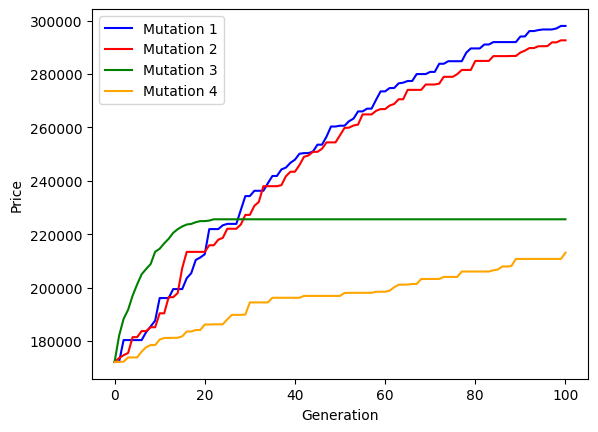

In [74]:
df = pd.read_csv('knapPI_3_500_1000_1_items.csv')
df.columns = [c.strip() for c in df.columns]
price = df['price']
weight = df['weight']

population = initialPopulation(popSize=100, numItems=500)
ans1 = differentialEvolution(population=population, price=price, weight=weight, capacity=1000000, generations=100, maximumLoop=100, crossoverRate=0.5, F=0.1, typeMutation='mutation1')
ans2 = differentialEvolution(population=population, price=price, weight=weight, capacity=1000000, generations=100, maximumLoop=100, crossoverRate=0.5, F=0.1, typeMutation='mutation2')
ans3 = differentialEvolution(population=population, price=price, weight=weight, capacity=1000000, generations=100, maximumLoop=100, crossoverRate=0.5, F=0.1, typeMutation='mutation3')
ans4 = differentialEvolution(population=population, price=price, weight=weight, capacity=1000000, generations=100, maximumLoop=100, crossoverRate=0.5, F=0.1, typeMutation='mutation4')

plt.xlabel('Generation')
plt.ylabel('Price')
plt.plot(ans1, color='blue', label='Mutation 1')
plt.plot(ans2, color='red', label='Mutation 2')
plt.plot(ans3, color='green', label='Mutation 3')   
plt.plot(ans4, color='orange', label='Mutation 4')
plt.legend()
plt.show()
# answer = differentialEvolution(popSize=100, numItems=500, price=price, weight=weight, capacity=1000000, generations=500, maximumLoop=100, crossoverRate=0.5, F=0.1)
